## Black Scholes
Ismael Oulkhir


Mail: oulkhir.ismael@gmail.com

LinkedIn: https://www.linkedin.com/in/ismail-oulkhir/


In [5]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

The **Black-Scholes formula** for a European call option is one of the most famous results in financial mathematics. It provides the theoretical price of a European call option based on the underlying asset's price, strike price, time to maturity, risk-free rate, and volatility. Below is a step-by-step derivation of the Black-Scholes formula.

---

### **1. Assumptions of the Black-Scholes Model**
1. The stock price $ S_t $ follows a geometric Brownian motion:
   $
   dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
   $
   Where:
   - $ \mu $: Drift (expected return).
   - $ \sigma $: Volatility.
   - $ W_t $: Standard Brownian motion.

2. The risk-free interest rate $ r $ is constant.

3. The stock pays no dividends during the life of the option.

4. There are no transaction costs or taxes.

5. The market is arbitrage-free.

---

### **2. Risk-Neutral Valuation**
Under the **risk-neutral measure** $ Q $, the drift $ \mu $ is replaced by the risk-free rate $ r $. The stock price dynamics become:
$
dS_t = r S_t \, dt + \sigma S_t \, dW_t^Q
$
Where $ W_t^Q $ is a Brownian motion under the risk-neutral measure.

---

### **3. Solution to the Geometric Brownian Motion**
The solution to the geometric Brownian motion under the risk-neutral measure is:
$
S_T = S_t \exp\left( \left( r - \frac{\sigma^2}{2} \right) (T - t) + \sigma (W_T^Q - W_t^Q) \right)
$
Where:
- $ S_T $: Stock price at maturity $ T $.
- $ S_t $: Stock price at time $ t $.

---

### **4. Payoff of a European Call Option**
The payoff of a European call option at maturity $ T $ is:
$
C_T = \max(S_T - K, 0)
$
Where:
- $ K $: Strike price.

---

### **5. Risk-Neutral Pricing Formula**
The price of the European call option at time $ t $ is the expected value of the discounted payoff under the risk-neutral measure:
$
C_t = e^{-r(T - t)} \mathbb{E}^Q[\max(S_T - K, 0) \mid \mathcal{F}_t]
$

---

### **6. Compute the Expected Payoff**
To compute $ \mathbb{E}^Q[\max(S_T - K, 0)] $, we use the fact that $ S_T $ is log-normally distributed. Let:
$
\ln(S_T) \sim N\left( \ln(S_t) + \left( r - \frac{\sigma^2}{2} \right) (T - t), \sigma^2 (T - t) \right)
$

Define:
$
d_1 = \frac{\ln(S_t / K) + \left( r + \frac{\sigma^2}{2} \right) (T - t)}{\sigma \sqrt{T - t}}
$
$
d_2 = d_1 - \sigma \sqrt{T - t}
$

The expected payoff can be expressed as:
$
\mathbb{E}^Q[\max(S_T - K, 0)] = S_t e^{r(T - t)} N(d_1) - K N(d_2)
$
Where $ N(\cdot) $ is the cumulative distribution function (CDF) of the standard normal distribution.

---

### **7. Discount the Expected Payoff**
The price of the European call option at time $ t $ is:
$
C_t = e^{-r(T - t)} \left( S_t e^{r(T - t)} N(d_1) - K N(d_2) \right)
$
Simplifying:
$
C_t = S_t N(d_1) - K e^{-r(T - t)} N(d_2)
$

---

### **8. Final Black-Scholes Formula**
The Black-Scholes formula for the price of a European call option is:
$
C_t = S_t N(d_1) - K e^{-r(T - t)} N(d_2)
$
Where:
$
d_1 = \frac{\ln(S_t / K) + \left( r + \frac{\sigma^2}{2} \right) (T - t)}{\sigma \sqrt{T - t}}
$
$
d_2 = d_1 - \sigma \sqrt{T - t}
$

---

### **9. Interpretation**
- $ S_t N(d_1) $: The expected benefit from acquiring the stock if the option is exercised.
- $ K e^{-r(T - t)} N(d_2) $: The present value of the strike price multiplied by the probability of exercising the option.

---

In [6]:
# Black-Scholes formula for European call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Parameters
K = 200  # Strike price
T = 1  # Maturity time (1 year)
r = 0.0477  # Risk-free rate (4.77%) FED FUND RATE
sigma = 0.67  # Volatility (67%) from market chameleon 

# Fetch TSLA price data for the past year
tsla = yf.Ticker("TSLA")
tsla_data = tsla.history(period="1y")
tsla_prices = tsla_data['Close'].values
dates = tsla_data.index

# Time to maturity (in years)
time_to_maturity = np.linspace(T, 0, len(tsla_prices))[::-1]

In [7]:
# Compute the European call option price for each day
call_prices = np.zeros_like(tsla_prices)
for i in range(len(tsla_prices)):
    call_prices[i] = black_scholes_call(tsla_prices[i], K, time_to_maturity[i], r, sigma)

C:\Users\Study.LEON\AppData\Local\Temp\ipykernel_540\1818305201.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


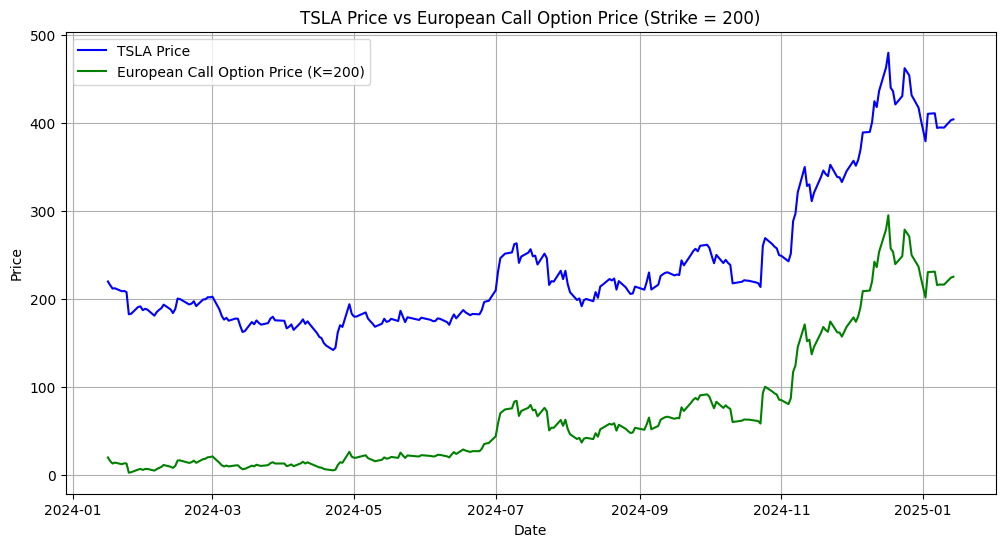

In [8]:
# Plot TSLA price data and European call option price
plt.figure(figsize=(12, 6))
plt.plot(dates, tsla_prices, label="TSLA Price", color="blue")
plt.plot(dates, call_prices, label="European Call Option Price (K=200)", color="green")
plt.title("TSLA Price vs European Call Option Price (Strike = 200)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()